<a href="https://colab.research.google.com/github/Wishmiii/Customer-Churn-Prediction-System-ML/blob/main/CustomerChurnPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Colab_Notebooks/MLCW"

CustomerChurnPredictionSystem.ipynb  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
import os, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
                             roc_auc_score, classification_report, confusion_matrix,
                             mean_squared_error, r2_score)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import tensorflow as tf
from imblearn.over_sampling import SMOTE

In [85]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MLCW/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Task 01 - Exploratory Data Analysis and Visualization

##Dataset Dimensions & Metadata

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Rows, Columns =",df.shape)


In [43]:
# Was not tought in tut
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# Basic Checks
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe(include="all")

##Identifying Missing Values

In [45]:
# Identifying missing values
df.isnull().sum().sort_values(ascending=False)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [46]:
# Check for whitespace-only cells
(df==" ").sum().sort_values(ascending=False)

,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [ ]:
# Detect cells that can not be converted to numbers in the TotalCharges column where missing values were
print(pd.to_numeric(df['TotalCharges'],errors='coerce').isnull().sum())

In [ ]:
# Identifying categorical and numerical values
print(f"Categorical Value Columns : {df.select_dtypes(include='object').columns.tolist()}")
print(f"Numeric Value Columns : {df.select_dtypes(include=['float64','int64']).columns.tolist()}")



In [ ]:
# Was not tought in tut
df.duplicated().sum()

In [ ]:
# Was not tought in tut
df.dtypes

In [47]:
# A closer look at the rows with missing values for TotalCharges
df[df['TotalCharges']==" "][['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##Checking for Duplicates

In [ ]:
#Check if any duplicate rows exist
df.duplicated().sum()

np.int64(0)

In [ ]:
#check for duplicate columns
df.columns.duplicated().sum()

np.int64(0)

In [ ]:
(df['InternetService'].unique())

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
(df['Contract'].unique())

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
(df['StreamingMovies'].unique())

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
(df['Contract'].unique())

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
(df['PaperlessBilling'].unique())

array(['Yes', 'No'], dtype=object)

In [ ]:
(df['PaymentMethod'].unique())

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
(df['SeniorCitizen'].unique())

array([0, 1])

In [ ]:
(df['Churn'].unique())

array(['No', 'Yes'], dtype=object)

In [ ]:
(df['StreamingMovies'].unique())

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
(df['PhoneService'].unique())

array(['No', 'Yes'], dtype=object)

##Feature Distributions

###Numerical Feature Distributions

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10,6))
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, color='skyblue', kde=True)
# sns.histplot(x='tenure', data=df, hue='Churn', bins=30, palette='pastel', kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, color='skyblue', kde=True)
# sns.histplot(x='tenure', data=df, hue='Churn', bins=30, palette='pastel', kde=True)
plt.title('Distribution of Monthly Charges ')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
#Used bar chart becuase 'TotalCharges' is in 'object' data type
total_charges=pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize=(8,5))
bins=[0,500, 1000,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500,6000, 6500, 7000, 7500,8000, 8500, 9000, 9500,10000]
sns.histplot(total_charges,bins= bins, color='skyblue', kde=True)
plt.xticks(rotation=45)
plt.title("Distribution of TotalCharges ")
plt.xlabel("Charge Ranges")
plt.ylabel("Customer Count")
plt.show()

In [ ]:
#Boxplots of Numeric Variables
numerical_cols=['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  series = pd.to_numeric( df[col], errors='coerce')
  sns.boxplot(y=series, color=sns.color_palette("pastel",8)[0])
  plt.title(f'{col} Distribution')
  plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['MonthlyCharges'], color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.ylabel('Monthly Charges $')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=pd.to_numeric(df['TotalCharges'], errors='coerce'), color='skyblue')
plt.title('Distribution of Total Charges')
plt.ylabel('Total Charges $')
plt.show()



In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['tenure'], color='skyblue')
plt.title('Distribution of Tenure')
plt.ylabel('Tenure (Months)')
plt.show()

In [ ]:
categorical_cols =  [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
plt.figure(figsize=(20,20))
for i, col in enumerate(categorical_cols):
  plt.subplot(5,4,i+1)
  sns.countplot(x=col, data=df, color=sns.color_palette("pastel",8)[0])
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Customer Count')

plt.tight_layout()
plt.show()


##Categorical Data Distribution

In [ ]:
sns.color_palette("pastel",8)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, color=sns.color_palette("pastel",8)[0])
plt.title('Contract Type Distribution')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, color=sns.color_palette("pastel",8)[0])
plt.title('Contract Type Distribution')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, color=sns.color_palette("pastel",8)[0])
plt.title('Contract Type Distribution')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

###Key Feature Relationships

In [ ]:
# Contract Vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
#Internet Service Vs. Churn
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#Total Charges Vs. Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn',y='TotalCharges', data=df, hue='Churn', palette='pastel')
plt.title('Churn by Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Customer Count')

##Data Visualization

In [ ]:
# Visualizing the Distribution of Churn
# Checks the class balance
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df, hue='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
# Calculate the precentage of churn values
df['Churn'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="Churn",palette="Set2")
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)*100

In [ ]:
#Total Charges Vs. Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn',y='tenure', data=df, hue='Churn', palette='pastel')
plt.title('Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
# Contract Type vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
# Seniority vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen',data=df, hue='Churn', palette='pastel')
plt.title('Churn by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Customer Count')
plt.show()

In [ ]:
# Churn Rate by Seniority (HeatMap)
senior_ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize="index")*100
plt.figure(figsize=(6,4))
sns.heatmap(senior_ct, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Churn Rate by Seniority (%)")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Churn", y="tenure", palette="pastel")
plt.title("Tenure Distribution by Churn Status (Violin Plot)")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']=="Yes"]["tenure"], shade=True, color="red", label="Churned")
sns.kdeplot(df[df['Churn']=="No"]["tenure"], shade=True, color="green", label="Stayed")
plt.title("KDE Density Plot – Tenure by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Churn"]=="Yes"]["tenure"], kde=True, bins=30, color="red", label="Churned")
sns.histplot(df[df["Churn"]=="No"]["tenure"], kde=True, bins=30, color="green", label="Stayed")
plt.title("Histogram Overlay – Tenure Distribution for Churn vs Non-Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
df['MultipleLines'].value_counts(normalize=True)*100

In [ ]:
#According to the above output 'No phone service" accounts for 9.7% of the data
# which is a significant portion (more than 5%). So we can use the method of creating
# a new category for this missing value

In [ ]:
#Check how churn behaves for each category
pd.crosstab(df['MultipleLines'],df['Churn'])

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [ ]:
churn_by_sec = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
churn_by_sec

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [ ]:
# pd.crosstab(df['OnlineSecurity'],df['Churn'])
df['OnlineSecurity'].value_counts(normalize=True)*100

,proportion
OnlineSecurity,
No,49.666335
Yes,28.666761
No internet service,21.666903


In [ ]:
churn_by_backup = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100
churn_by_backup

Churn,No,Yes
OnlineBackup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


In [ ]:
# pd.crosstab(df['OnlineBackup'],df['Churn'])
df['OnlineBackup'].value_counts(normalize=True)*100

,proportion
OnlineBackup,
No,43.844952
Yes,34.488144
No internet service,21.666903


In [ ]:
churn_by_dev = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100
churn_by_dev

Churn,No,Yes
DeviceProtection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


In [ ]:
# pd.crosstab(df['DeviceProtection'],df['Churn'])
df['DeviceProtection'].value_counts(normalize=True)*100

,proportion
DeviceProtection,
No,43.944342
Yes,34.388755
No internet service,21.666903


In [ ]:
churn_by_tech = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
churn_by_tech

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [ ]:
# pd.crosstab(df['TechSupport'],df['Churn'])
df['TechSupport'].value_counts(normalize=True)*100

,proportion
TechSupport,
No,49.311373
Yes,29.021724
No internet service,21.666903


In [ ]:
churn_by_stv = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100
churn_by_stv

Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


In [ ]:
# pd.crosstab(df['StreamingTV'],df['Churn'])
df['StreamingTV'].value_counts(normalize=True)*100

,proportion
StreamingTV,
No,39.897771
Yes,38.435326
No internet service,21.666903


In [ ]:
churn_by_smv = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100
churn_by_smv

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


In [ ]:
# pd.crosstab(df['StreamingMovies'],df['Churn'])
df['StreamingMovies'].value_counts(normalize=True)*100

,proportion
StreamingMovies,
No,39.542808
Yes,38.790288
No internet service,21.666903


In [ ]:
df['MultipleLines'].value_counts(normalize=True)*100

,proportion
MultipleLines,
No,48.132898
Yes,42.183729
No phone service,9.683374


In [ ]:
churn_by_mult = pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index') * 100
churn_by_mult


Churn,No,Yes
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


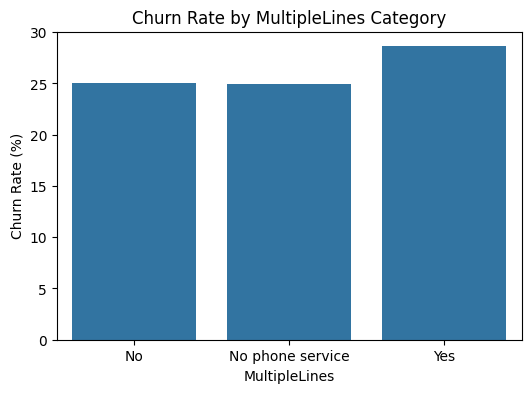

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=churn_by_mult.index, y=churn_by_mult['Yes'])
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by MultipleLines Category")
plt.show()

# Task 02




Q: Implement the classification task using a Neural network-based model and a Decision Tree model. Conduct
Data preprocessing tasks required for the dataset, problem, and the algorithms. Perform hyperparameter
tuning required for the algorithms. Include all the information regarding your work and results in the report.
Respective libraries, frameworks, tools, etc., must be used for model implementation. The implemented models
should be compared based on the optimal evaluation metrics. Experimental results should be showcased for
both model experimental settings.

List
 - Data Preprocessing for the dataset, problem and algorithm
 - classification using NN and Decision Tree
 - Perform hyperparameter tuning for the algorithms
 - Compare models


##Handling Missing Values

In [86]:
# Handling missing values in TotalCharges

# 1. Converting TotalCharges to a numerical value
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2143241495.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [87]:
#Search the entire dataset for blank strings, empty strings, cells with only whitespace
#and convert in to NaN values that are detectable in df.isnull() and df.isna()
df.replace(r'^\s*$',np.nan, regex=True, inplace=True)
df.isna().sum()
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##Droping Unwanted Columns

In [88]:
# Removing 'customerID' column
df.drop(columns=["customerID"], inplace=True)

##Data Transformation

###Target Variable Encoding

In [89]:
#Encoding the Target variable
# Maping 'Yes' and 'No' values to 1 and 0 and any other value to NaN and
# assigning it to the original column
df['Churn']= df['Churn'].map({'Yes':1, 'No':0})

###Encoding Categorical Features

In [90]:
#Converting Yes/No columns to binary
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for column in binary_columns:
  df[column] = df[column].map({'Yes':1, 'No':0})

#mapping gender column
df['gender'] = df['gender'].map({'Female':1, 'Male':0})


In [91]:
#One-Hot-Encoding multi category columns
service_info_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']
df=pd.get_dummies(df,columns=service_info_cols,drop_first=True)

multi_cat_columns=['InternetService','Contract','PaymentMethod']
df=pd.get_dummies(df,columns=multi_cat_columns,drop_first=True)

###Dropping the Target column

In [92]:
X = df.drop(columns=['Churn'])
y=df['Churn']

##Scaling Numerical Features


In [93]:
def scale_numerical_features(df, numeric_columns):
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [94]:
#Applying scaling to the dataset
numeric_columns=['tenure','MonthlyCharges','TotalCharges']
df = scale_numerical_features(df, numeric_columns)

##Train-Test Split

In [95]:
#Data should be splitted before balancing with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Handle Class Imbalance

In [96]:
#For Neural Network
#Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

##Model Development

###Decision Tree Model

In [97]:
# Defining the Decision Tree Model
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
    )

##Hyperparameter Tuning (Decision Tree)

In [98]:
dt_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 5, 10, 20],
    'min_samples_split' : [2,10,50],
    'min_samples_leaf' : [1,3,5]
}

In [99]:
dt_grid = GridSearchCV(
    estimator = dt_model,
    param_grid = dt_param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose=1
)

In [100]:
#Fitting the Decision Tree Model
dt_grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 10, 50]},
             scoring='f1', verbose=1)

In [107]:
print("Best Decision Tree params: ",dt_grid.best_params_)
print("Best CV F1: ", dt_grid.best_score_)

Best Decision Tree params:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV F1:  0.8082320253862012


In [108]:
#Final Model
best_dt=dt_grid.best_estimator_

###Neural Network-based model

In [110]:
#Define the Neural Network Model
nn_model=MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

##Hyperparameter Tuning (Neural Network)

In [111]:
nn_param_grid = {
    'hidden_layer_sizes':[(32,),(64,),(64,32)],
    'activation':['relu','tanh'],
    'alpha':[0.0001,0.001],
    'learning_rate_init':[0.001,0.01]
}


In [112]:
nn_grid = GridSearchCV(
    estimator = nn_model,
    param_grid = nn_param_grid,
    scoring = 'f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [113]:
nn_grid.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(32,), (64,), (64, 32)],
                         'learning_rate_init': [0.001, 0.01]},
             scoring='f1', verbose=1)

In [75]:
#Model Predictions
dt_prediction_y = dt_model.predict(X_test)
nn_prediction_y = nn_model.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [80]:
best_nn=nn_grid.best_estimator_

#Model Evaluation

In [77]:
#A function for Model Evaluation

def evaluate(model, X_test, y_test):
  y_predictions = model.predict(X_test)
  y_probabilities = model.predict_proba(X_test)[:,1]

  print("Accuracy:",accuracy_score(y_test,y_predictions))
  print("Precision:",precision_score(y_test,y_predictions))
  print("Recall:",recall_score(y_test,y_predictions))
  print("F1 Score:",f1_score(y_test,y_predictions))
  print("ROC-AUC:",roc_auc_score(y_test,y_probabilities))
  print("\nClassification Report\n",classification_report(y_test,y_predictions))
  print(" ")
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_predictions))
  print("\nClassification Report\n",classification_report(y_test,y_predictions))

In [83]:
evaluate(best_dt, X_test, y_test)

Accuracy: 0.7416607523066004
Precision: 0.5079928952042628
Recall: 0.7667560321715817
F1 Score: 0.6111111111111112
ROC-AUC: 0.8022619996480587

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409

 
Confusion Matrix:
 [[759 277]
 [ 87 286]]

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



In [81]:
evaluate(best_nn, X_test, y_test)

Accuracy: 0.7267565649396736
Precision: 0.4879032258064516
Recall: 0.6487935656836461
F1 Score: 0.5569620253164557
ROC-AUC: 0.7801569762025526

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1036
           1       0.49      0.65      0.56       373

    accuracy                           0.73      1409
   macro avg       0.67      0.70      0.68      1409
weighted avg       0.76      0.73      0.74      1409

 
Confusion Matrix:
 [[782 254]
 [131 242]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1036
           1       0.49      0.65      0.56       373

    accuracy                           0.73      1409
   macro avg       0.67      0.70      0.68      1409
weighted avg       0.76      0.73      0.74      1409

